In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.7/site-packages (0.20.2)


In [2]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(sklearn.__version__)

1.3.0


In [4]:
print(np.__version__)

1.24.3


In [5]:
print(pd.__version__)

1.5.3


### The Titanic dataset

Source: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

In [40]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
titanic_df.rename(columns = {'SibSp':'SiblingSpouse','Parch':'ParentChild'}, inplace = True)

In [43]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParentChild,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
titanic_df.shape

(891, 12)

In [45]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
ParentChild      0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)

titanic_df.head()

/var/folders/fq/rmcf4vf118l0xb72bpz0jzk40000gn/T/ipykernel_21791/124848048.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)


,Survived,Pclass,Sex,Age,SibSp,ParentChild,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived       179
Pclass         179
Sex            179
Age              2
SibSp          179
ParentChild    179
Fare           179
Embarked       177
dtype: int64

In [48]:
titanic_df = titanic_df.dropna()

In [49]:
titanic_df.shape

(712, 8)

In [52]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
ParentChild    0
Fare           0
Embarked       0
dtype: int64

In [61]:
titanic_df.describe()

,Survived,Pclass,Age,SiblingSpouse,ParentChild,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [56]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SiblingSpouse,ParentChild,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Visualizing relationships

Text(0, 0.5, 'Survived')

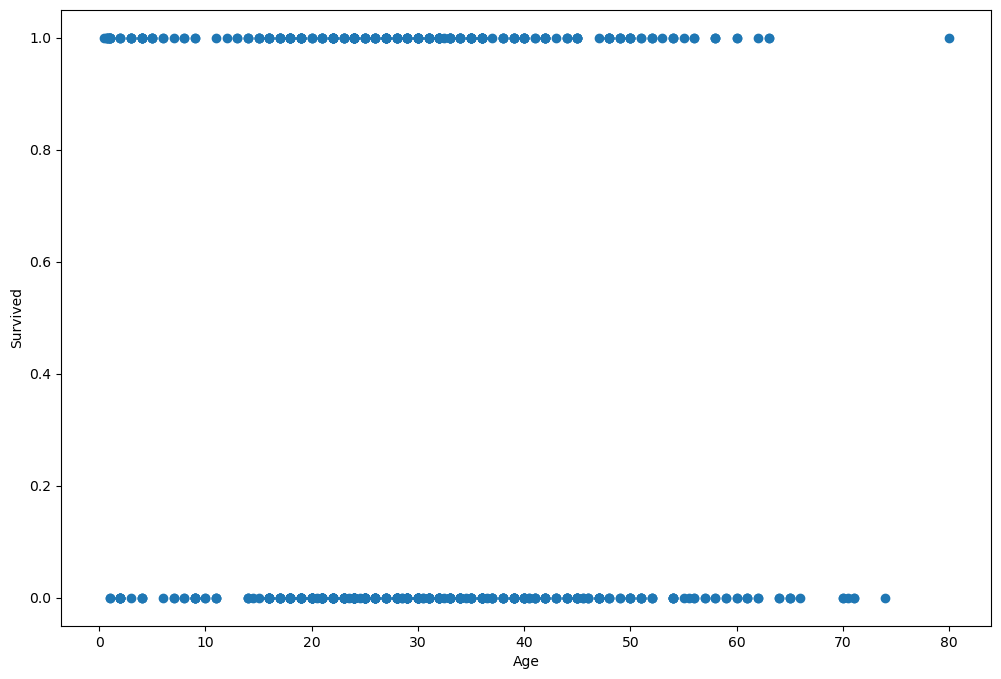

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Age'], titanic_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

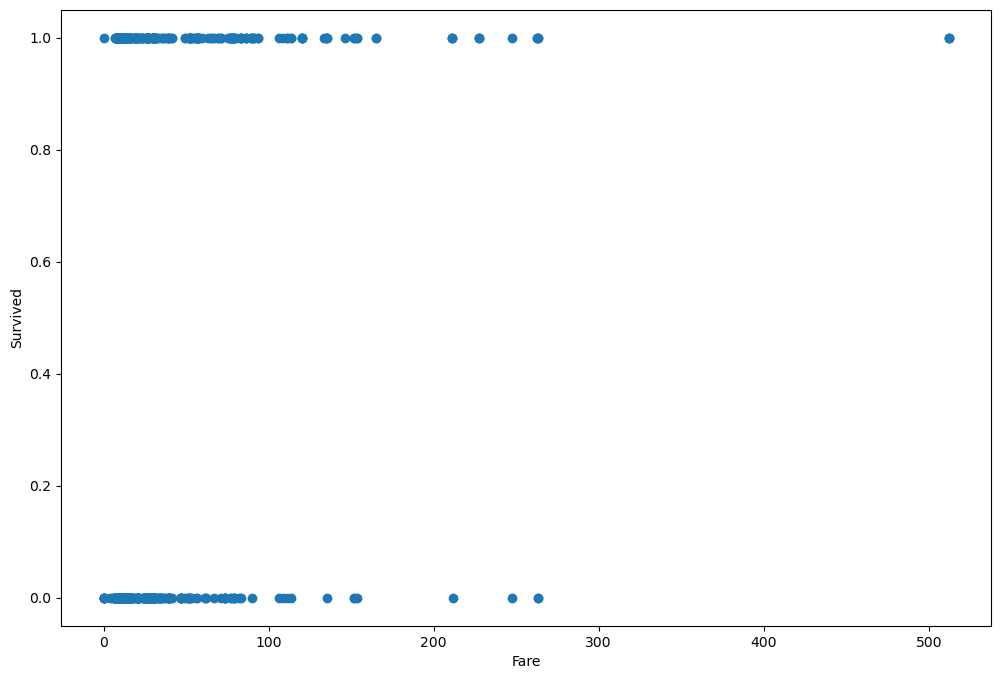

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Fare'], titanic_df['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

In [59]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [60]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [62]:
titanic_data_corr = titanic_df.corr()

titanic_data_corr

/var/folders/fq/rmcf4vf118l0xb72bpz0jzk40000gn/T/ipykernel_21791/1701824440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data_corr = titanic_df.corr()


,Survived,Pclass,Age,SiblingSpouse,ParentChild,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SiblingSpouse,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
ParentChild,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<Axes: >

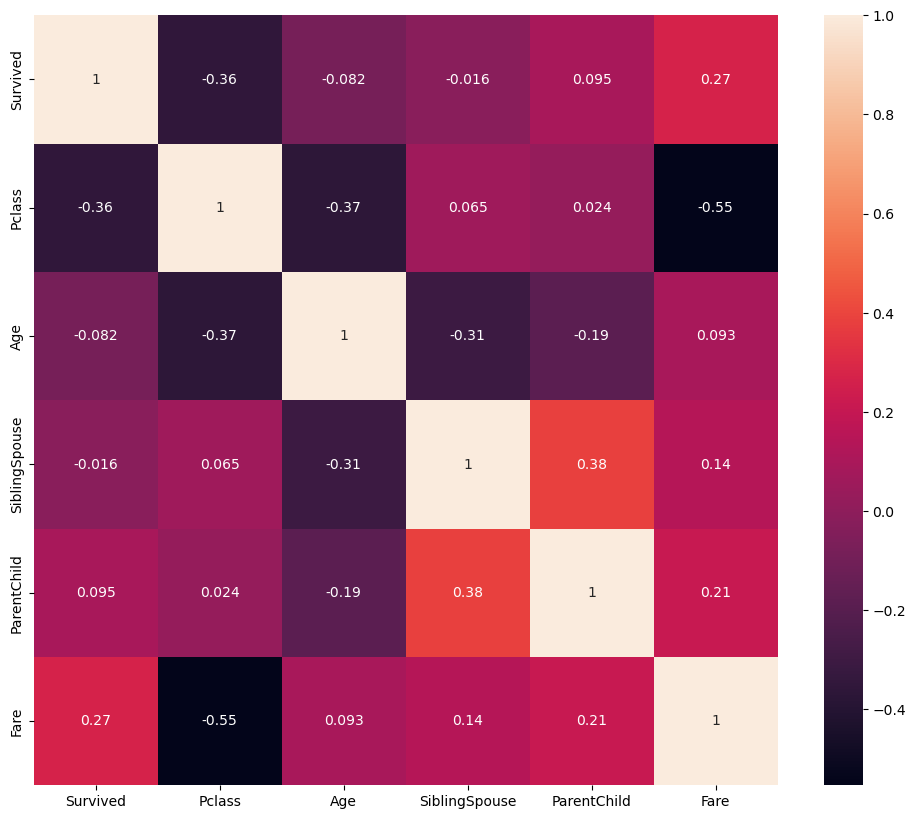

In [63]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(titanic_data_corr, annot=True)

In [65]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.head()

,Survived,Pclass,Sex,Age,SiblingSpouse,ParentChild,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [66]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

#### C = Cherbourg,  Q = Queenstown,  S = Southampton

In [67]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df.head()

,Survived,Pclass,Sex,Age,SiblingSpouse,ParentChild,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [68]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SiblingSpouse,ParentChild,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,27.00,0,0,7.9250,0,0,1
1,1,3,1,0.42,0,1,8.5167,1,0,0
2,0,3,0,22.00,0,0,9.8375,0,0,1
3,1,3,0,5.00,4,2,31.3875,0,0,1
4,0,3,1,28.00,0,0,9.5000,0,0,1


In [69]:
titanic_df.to_csv('datasets/titanic_processed.csv', index=False)

In [70]:
!ls datasets

fashion-mnist_train.csv titanic_processed.csv   titanic_train.csv
